Tutorial from:
https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0

In [0]:
!pip3 install -q gym

In [0]:
import gym
import numpy as np

In [0]:
env = gym.make('FrozenLake-v0')

In [0]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .8
y = .95
num_episodes = 2000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)

In [7]:
print("Score over time: ", str(sum(rList)/num_episodes))
print("Final Q-Table Values:")
print(Q)

Score over time:  0.5215
Final Q-Table Values:
[[1.44201353e-01 8.49598214e-03 6.62636569e-03 7.83928940e-03]
 [4.36601911e-04 8.20130666e-04 2.54125932e-03 2.27053104e-01]
 [1.10117742e-01 2.33285129e-03 2.72665423e-03 6.42579008e-03]
 [0.00000000e+00 2.12960938e-04 3.94996024e-04 6.21590170e-03]
 [2.09642911e-01 1.02582449e-03 7.90718560e-04 1.28457686e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.38481362e-04 5.71919226e-06 1.60570753e-02 2.53838881e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.03919802e-03 9.62000742e-04 9.99527764e-04 3.51121102e-01]
 [1.75651313e-03 4.50523507e-01 1.96646809e-03 9.14212414e-04]
 [1.76253316e-01 8.42173722e-04 0.00000000e+00 2.85065548e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.08818811e-03 4.30335590e-03 3.99186876e-01 6.46688816e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.38690233e-01]
 [0.0000

In [0]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
env = gym.make('FrozenLake-v0')

In [0]:
tf.reset_default_graph()

In [0]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [12]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [18]:
# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            if i == num_episodes-1:
              print('j:', j, 's1:', s1, 'd:', d, 'maxQ1:', maxQ1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: ", str(sum(rList)/num_episodes), "%")

j: 1 s1: 0 d: False maxQ1: 0.53847766
j: 2 s1: 0 d: False maxQ1: 0.5374007
j: 3 s1: 0 d: False maxQ1: 0.53632593
j: 4 s1: 0 d: False maxQ1: 0.5352533
j: 5 s1: 4 d: False maxQ1: 0.5462005
j: 6 s1: 8 d: False maxQ1: 0.58004665
j: 7 s1: 9 d: False maxQ1: 0.57925224
j: 8 s1: 8 d: False maxQ1: 0.5787293
j: 9 s1: 9 d: False maxQ1: 0.5779902
j: 10 s1: 10 d: False maxQ1: 0.38003355
j: 11 s1: 14 d: False maxQ1: 0.80959934
j: 12 s1: 15 d: True maxQ1: 0.008986952
Percent of succesful episodes:  0.4235 %


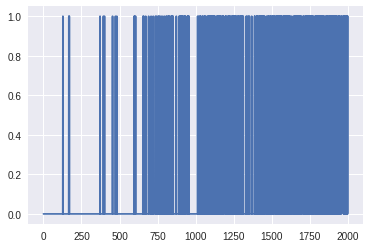

In [14]:
plt.plot(rList)

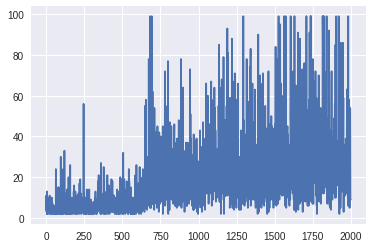

In [15]:
plt.plot(jList)